# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import nltk
import base64
import numpy as np
import string
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

# Reading the data

In [2]:
data=pd.read_csv('Days_Inn_Suites_by_Wyndham_Downtown_Gatlinburg_Parkway-Gatlinburg_Tennessee__en.csv')
data=data.dropna()
data.shape

(1854, 4)

In [3]:
data1=pd.read_csv('Holiday_Inn_Club_Vacations_Smoky_Mountain_Resort-Gatlinburg_Tennessee__en.csv')
data1=data1.dropna()
data1.shape

(985, 4)

In [4]:
print(data['rating'].value_counts())
print(data1['rating'].value_counts())

1.0    564
2.0    447
3.0    403
4.0    244
5.0    196
Name: rating, dtype: int64
5.0    627
4.0    209
3.0     75
1.0     48
2.0     26
Name: rating, dtype: int64


# Converting to CSV Files

In [5]:
hotel1=data[data['rating']<3]
hotel2=data1[data1['rating']<3]
bad_rating=pd.concat([hotel1,hotel2], axis=0)
bad_rating.to_csv('bad_rating.csv',index=False)
bad_rating.head(2)

,review_paragraph,review_date,main_review,rating
3,We had two rooms. Both had doors that where ki...,"November 30, 2018",What DUMP!!!!,1.0
5,"Not great value, rooms need major upgrade. Loc...","November 23, 2018",Disappointed Stay,1.0


In [6]:
hotel11=data[data['rating']>=3]
hotel12=data1[data1['rating']>=3]
good_rating=pd.concat([hotel11,hotel12], axis=0)
good_rating.to_csv('good_rating.csv',index=False)
good_rating.head(2)

,review_paragraph,review_date,main_review,rating
1,The room was rather large which my whole group...,"November 30, 2018",Okay,3.0
9,Had old TV in room. Flat screen OK. Phone not ...,"November 15, 2018",Fair rooms,4.0


# Storing the data in MongoDB

In [7]:
import csv
import json
import pandas as pd
import sys, getopt, pprint
from pymongo import MongoClient
#CSV to JSON Conversion
#client = MongoClient()
mongo_client=MongoClient() 
db=mongo_client.october_mug_talk
rating = db.rating
df = pd.read_csv("C:/Users/Rohit/Downloads/LDA/good_rating.csv") #csv file which you want to import
records_ = df.to_dict(orient = 'records')
result = db.rating.insert_many(records_ )
pprint.pprint(rating.find_one())

{'_id': ObjectId('5c0874f31c8a872ad4325155'),
 'main_review': 'What DUMP!!!!',
 'rating': 1.0,
 'review_date': 'November 30, 2018',
 'review_paragraph': 'We had two rooms. Both had doors that where kicked in '
                     'one Too many times. The beds were like sleeping on her '
                     'sheet of plywood. The one room has black mold growing in '
                     'the curtains end air-conditioner. We also found black '
                     'mold in the shower tub. The telephone and then beat so '
                     'bad it was dead. The fire alarm was barely hanging on '
                     'the wall. And I have pictures of all this. Would not '
                     'recommend this place to anyone. Not even my dog. Moved '
                     'out once we got back from breakfast and could see what '
                     'it was like in the daylight. '}


In [8]:
import csv
import json
import pandas as pd
import sys, getopt, pprint
from pymongo import MongoClient
#CSV to JSON Conversion
#client = MongoClient()
mongo_client=MongoClient() 
db=mongo_client.october_mug_talk
rating = db.rating
df = pd.read_csv("C:/Users/Rohit/Downloads/LDA/bad_rating.csv") #csv file which you want to import
records_ = df.to_dict(orient = 'records')
result = db.rating.insert_many(records_ )
pprint.pprint(rating.find_one())

{'_id': ObjectId('5c0874f31c8a872ad4325155'),
 'main_review': 'What DUMP!!!!',
 'rating': 1.0,
 'review_date': 'November 30, 2018',
 'review_paragraph': 'We had two rooms. Both had doors that where kicked in '
                     'one Too many times. The beds were like sleeping on her '
                     'sheet of plywood. The one room has black mold growing in '
                     'the curtains end air-conditioner. We also found black '
                     'mold in the shower tub. The telephone and then beat so '
                     'bad it was dead. The fire alarm was barely hanging on '
                     'the wall. And I have pictures of all this. Would not '
                     'recommend this place to anyone. Not even my dog. Moved '
                     'out once we got back from breakfast and could see what '
                     'it was like in the daylight. '}


# Graph Function showing Frequency of stopwords without stopwords removal

In [9]:
##For bad rating
## function to find the frequency of the words before removal of stopwords
def freq_without_removal(col_name):
    all_words = bad_rating[col_name].str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[0:100]
                        ),
            text='Word counts'
            )]

    layout = go.Layout(
        title='Top 50 (Uncleaned) Word frequencies in the bad rating dataset'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')
freq_without_removal('main_review')    

In [10]:
##For good rating
## function to find the frequency of the words before removal of stopwords
def freq_without_removal(col_name):
    all_words = good_rating[col_name].str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[0:100]
                        ),
            text='Word counts'
            )]

    layout = go.Layout(
        title='Top 50 (Uncleaned) Word frequencies in the good rating dataset'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')
freq_without_removal('main_review')    

# Converting to Lower case

In [11]:
##converting to lower for bad_rating
bad_rating['review_paragraph'] = bad_rating['review_paragraph'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
bad_rating['main_review'] = bad_rating['main_review'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
##converting to lower for good_rating
good_rating['review_paragraph'] = good_rating['review_paragraph'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
good_rating['main_review'] = good_rating['main_review'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))

# Removing Punctuations

In [12]:
#removing punctuations

bad_rating['review_paragraph'] = bad_rating['review_paragraph'].apply(lambda x: ' '.join([i.translate(str.maketrans('','', string.punctuation)) for i in x.split()]))
bad_rating['main_review'] = bad_rating['main_review'].apply(lambda x: ' '.join([i.translate(str.maketrans('','', string.punctuation)) for i in x.split()]))
good_rating['review_paragraph'] = good_rating['review_paragraph'].apply(lambda x: ' '.join([i.translate(str.maketrans('','', string.punctuation)) for i in x.split()]))
good_rating['main_review'] = good_rating['main_review'].apply(lambda x: ' '.join([i.translate(str.maketrans('','', string.punctuation)) for i in x.split()]))


# Remove stop words

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
bad_rating['review_paragraph'] = bad_rating['review_paragraph'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
bad_rating['main_review'] = bad_rating['main_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
good_rating['review_paragraph'] = good_rating['review_paragraph'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
good_rating['main_review'] = good_rating['main_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
##For bad rating
## function to find the frequency of the words before removal of stopwords
def freq_without_removal(col_name):
    all_words = bad_rating[col_name].str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[0:100]
                        ),
            text='Word counts'
            )]

    layout = go.Layout(
        title='Top 50 (cleaned) Word frequencies in the bad rating dataset'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')
freq_without_removal('main_review')    

In [15]:
##For bad rating
## function to find the frequency of the words before removal of stopwords
def freq_without_removal(col_name):
    all_words = good_rating[col_name].str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
            x = all_words.index.values[0:50],
            y = all_words.values[0:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[0:100]
                        ),
            text='Word counts'
            )]

    layout = go.Layout(
        title='Top 50 (cleaned) Word frequencies in the good rating dataset'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')
freq_without_removal('main_review')    

# Word cloud without stopwords

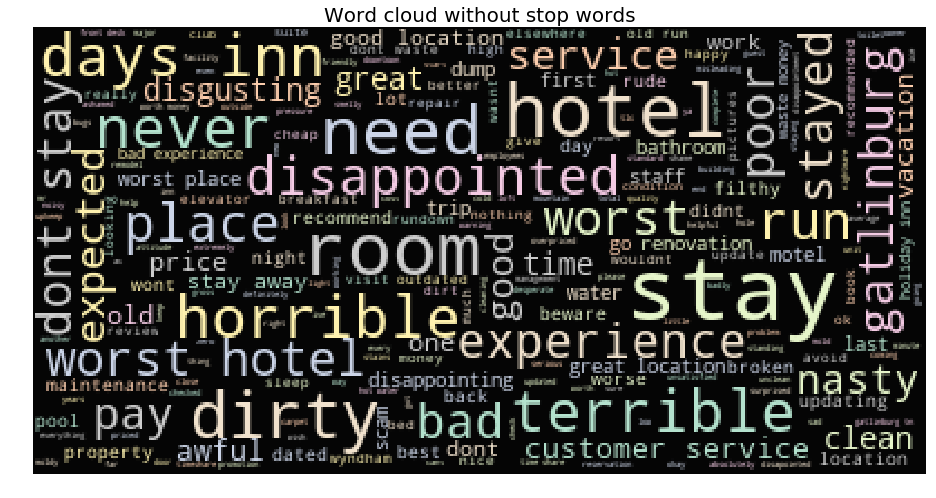

In [16]:
##word clouds for bad rating with removal of stopwords
from wordcloud import STOPWORDS,WordCloud

def word_cloud (col):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=10000, max_font_size= 40)
    wc.generate(" ".join(bad_rating[col]))
    plt.title("Word cloud without stop words", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')
word_cloud('main_review')

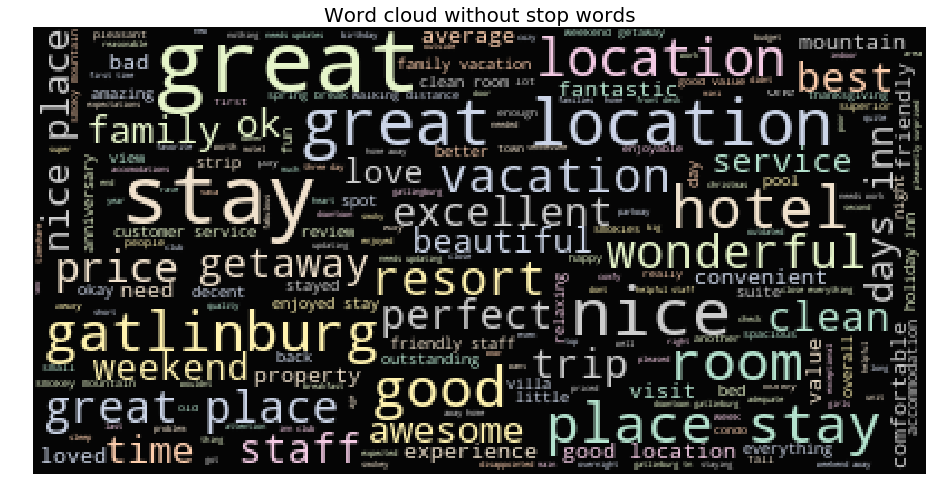

In [17]:
##word clouds for bad rating with removal of stopwords
from wordcloud import STOPWORDS,WordCloud

def word_cloud (col):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=10000, max_font_size= 40)
    wc.generate(" ".join(good_rating[col]))
    plt.title("Word cloud without stop words", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')
word_cloud('main_review')

# Function to show wordcloud after removal of stop words

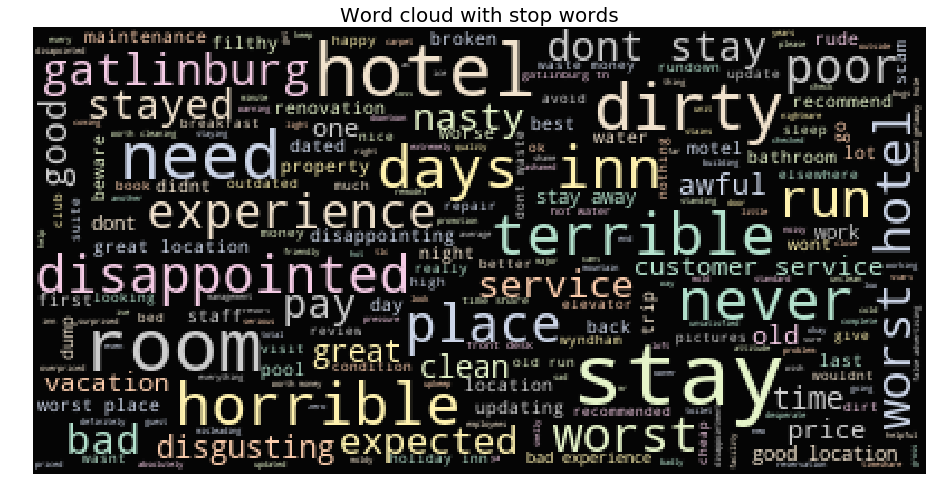

In [18]:
##word clouds for bad rating with removal of stopwords
from wordcloud import STOPWORDS,WordCloud

def word_cloud (col):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS,max_font_size= 40)
    wc.generate(" ".join(bad_rating[col]))
    plt.title("Word cloud with stop words", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')
word_cloud('main_review')

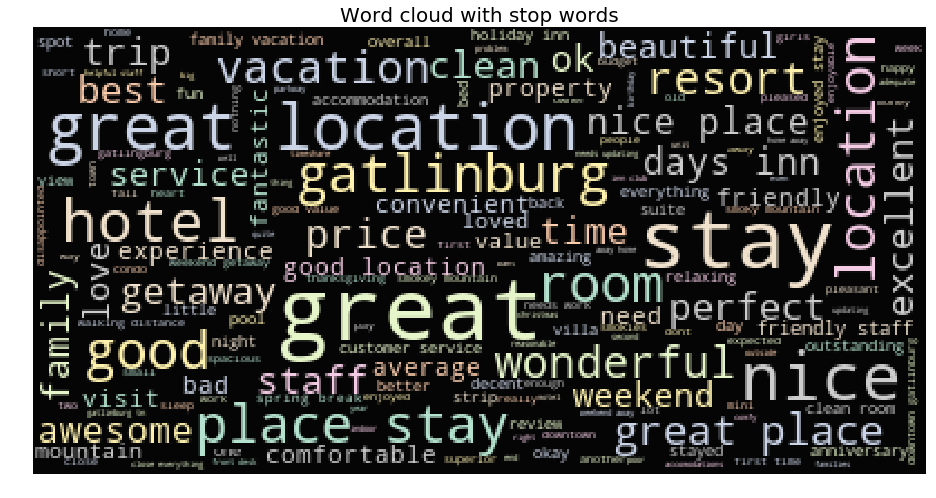

In [19]:
##word clouds for good rating with removal of stopwords
from wordcloud import STOPWORDS,WordCloud

def word_cloud (col):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="black", max_words=10000, 
                stopwords=STOPWORDS,max_font_size= 40)
    wc.generate(" ".join(good_rating[col]))
    plt.title("Word cloud with stop words", fontsize=20)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')
word_cloud('main_review')

In [20]:
list(bad_rating)

['review_paragraph', 'review_date', 'main_review', 'rating']

# Tokenization of words

In [21]:
main_review_token_bad = [nltk.word_tokenize(i) for i in bad_rating['main_review']]
paragraph_review_token_bad= [nltk.word_tokenize(i) for i in bad_rating['review_paragraph']]
main_review_token_good = [nltk.word_tokenize(i) for i in good_rating['main_review']]
paragraph_review_token_good= [nltk.word_tokenize(i) for i in good_rating['review_paragraph']]

# Stemming of words

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
main_review_stemmed_good =[]
paragraph_review_stemmed_good=[]
main_review_stemmed_bad=[]
paragraph_review_stemmed_bad=[]
for i in main_review_token_bad:
    main_review_stemmed_bad.append([ps.stem(w) for w in i])
for j in paragraph_review_token_bad:
    paragraph_review_stemmed_bad.append([ps.stem(w) for w in j])
for k in main_review_token_good:
    main_review_stemmed_good.append([ps.stem(w) for w in k])
for l in paragraph_review_token_good:
    paragraph_review_stemmed_good.append([ps.stem(w) for w in l])    

# Generating Dictionary and Implementation of LDA

In [23]:
import gensim
from gensim import corpora, models
dictionary_bound_good = corpora.Dictionary(main_review_stemmed_good)
dictionary_bound_bad = corpora.Dictionary(main_review_stemmed_bad)

c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1212: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [24]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 
corpus_good = [dictionary_bound_good.doc2bow(text) for text in main_review_stemmed_good]
corpus_bad = [dictionary_bound_bad.doc2bow(text) for text in main_review_stemmed_bad]

coh_ls_good = []

for number_of_topics in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus_good, num_topics=number_of_topics, id2word = dictionary_bound_good, passes = 15, alpha='auto')
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=main_review_stemmed_good, dictionary=dictionary_bound_good, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_ls_good.append(coherence_lda)
  

In [25]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 
corpus_good = [dictionary_bound_good.doc2bow(text) for text in main_review_stemmed_good]
corpus_bad = [dictionary_bound_bad.doc2bow(text) for text in main_review_stemmed_bad]

coh_ls_bad = []

for number_of_topics in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus_bad, num_topics=number_of_topics, id2word = dictionary_bound_bad, passes = 15, alpha='auto')
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=main_review_stemmed_bad, dictionary=dictionary_bound_bad, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coh_ls_bad.append(coherence_lda)    

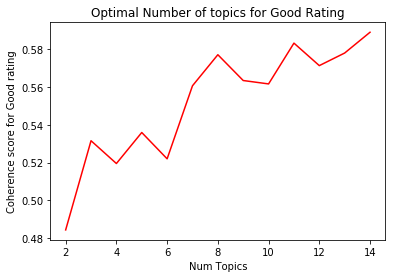

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
x = range(2,15)
plt.plot(x, coh_ls_good, label = 'coherence score',color="red")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score for Good rating")
plt.title('Optimal Number of topics for Good Rating')
plt.show() 



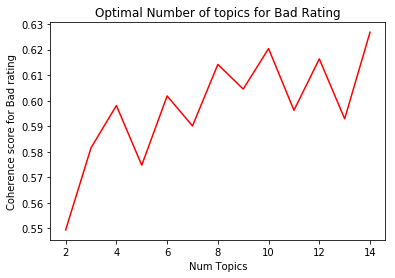

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
x = range(2,15)
plt.plot(x, coh_ls_bad, label = 'coherence score',color="red")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score for Bad rating")
plt.title('Optimal Number of topics for Bad Rating')
plt.show() 

In [ ]:
ldamodel_bound_good = gensim.models.ldamodel.LdaModel(corpus_good, num_topics=5, id2word = dictionary_bound_good, passes = 20)
print("------------------------------Good Rating-------------------------------------------")
print (ldamodel_bound_good.print_topics(num_topics=5, num_words=10))

ldamodel_bound_bad = gensim.models.ldamodel.LdaModel(corpus_bad, num_topics=5, id2word = dictionary_bound_bad, passes = 20)
print("------------------------------Bad Rating-------------------------------------------")
print (ldamodel_bound_bad.print_topics(num_topics=9, num_words=10))

------------------------------Good Rating-------------------------------------------
[(0, '0.087*"stay" + 0.064*"gatlinburg" + 0.057*"wonder" + 0.046*"trip" + 0.046*"love" + 0.023*"enjoy" + 0.021*"hotel" + 0.021*"averag" + 0.016*"need" + 0.015*"best"'), (1, '0.166*"great" + 0.135*"locat" + 0.043*"hotel" + 0.035*"staff" + 0.034*"price" + 0.033*"room" + 0.029*"nice" + 0.025*"good" + 0.021*"friendli" + 0.018*"ok"'), (2, '0.141*"stay" + 0.106*"place" + 0.082*"great" + 0.065*"nice" + 0.048*"good" + 0.024*"servic" + 0.024*"day" + 0.024*"excel" + 0.021*"inn" + 0.021*"gatlinburg"'), (3, '0.063*"resort" + 0.054*"time" + 0.049*"mountain" + 0.044*"awesom" + 0.033*"beauti" + 0.028*"smoki" + 0.023*"experi" + 0.019*"holiday" + 0.018*"smokey" + 0.017*"visit"'), (4, '0.081*"vacat" + 0.055*"getaway" + 0.053*"famili" + 0.034*"room" + 0.033*"weekend" + 0.028*"away" + 0.026*"clean" + 0.021*"perfect" + 0.020*"get" + 0.018*"home"')]


In [ ]:
tfidf = models.TfidfModel(corpus_good)
corpus_tfidf_good = tfidf[corpus_good]
corpus_lda_good = ldamodel_bound_good[corpus_tfidf_good]

In [ ]:
tfidf = models.TfidfModel(corpus_bad)
corpus_tfidf_bad = tfidf[corpus_bad]
corpus_lda_bad = ldamodel_bound_good[corpus_tfidf_bad]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
panel_good = pyLDAvis.gensim.prepare(ldamodel_bound_good, corpus_lda_good, dictionary_bound_good, mds='tsne')
panel_good